In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("emissions.csv")
df2 = df[["project_name", "cpu_energy", "ram_energy"]]

In [3]:
df2 = df2.set_index("project_name")

Text(0.5, 0, '')

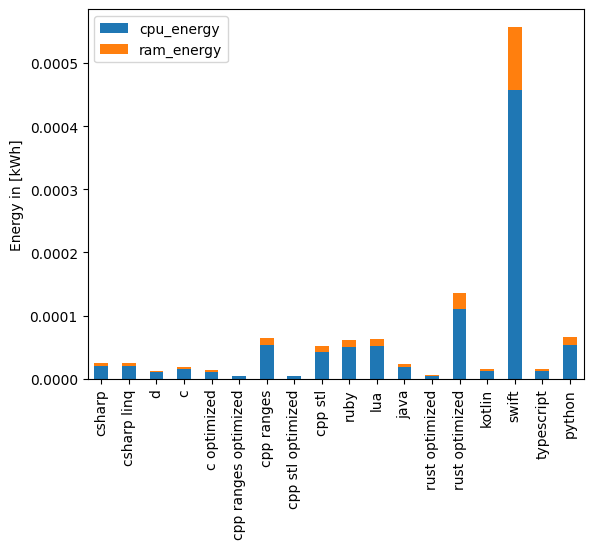

In [4]:
ax = df2.plot.bar(stacked=True)
plt.ylabel("Energy in [kWh]")
plt.xlabel("")
#ax.bar_label(ax.containers[0])

In [5]:
df2

,cpu_energy,ram_energy
project_name,,
csharp,0.000020,4.340755e-06
csharp linq,0.000020,4.345601e-06
d,0.000010,2.210555e-06
c,0.000015,3.231016e-06
c optimized,0.000011,2.337370e-06
cpp ranges optimized,0.000004,8.638855e-07
cpp ranges,0.000053,1.171836e-05
cpp stl optimized,0.000004,8.313933e-07
cpp stl,0.000042,9.240343e-06


In [6]:
df2["total_energy"] = df2.cpu_energy + df2.ram_energy

In [7]:
df2

,cpu_energy,ram_energy,total_energy
project_name,,,
csharp,0.000020,4.340755e-06,0.000024
csharp linq,0.000020,4.345601e-06,0.000024
d,0.000010,2.210555e-06,0.000012
c,0.000015,3.231016e-06,0.000018
c optimized,0.000011,2.337370e-06,0.000013
cpp ranges optimized,0.000004,8.638855e-07,0.000005
cpp ranges,0.000053,1.171836e-05,0.000065
cpp stl optimized,0.000004,8.313933e-07,0.000005
cpp stl,0.000042,9.240343e-06,0.000051


In [8]:
df2.sort_values("total_energy", ascending=False)

,cpu_energy,ram_energy,total_energy
project_name,,,
swift,0.000457,1.004459e-04,0.000557
rust optimized,0.000111,2.432674e-05,0.000135
python,0.000054,1.177628e-05,0.000065
cpp ranges,0.000053,1.171836e-05,0.000065
lua,0.000052,1.140346e-05,0.000063
ruby,0.000050,1.101055e-05,0.000061
cpp stl,0.000042,9.240343e-06,0.000051
csharp linq,0.000020,4.345601e-06,0.000024
csharp,0.000020,4.340755e-06,0.000024


In [9]:
min_val = df2.total_energy.min()
df2["normed_total_energy"] = df2.total_energy / min_val

In [10]:
df2

,cpu_energy,ram_energy,total_energy,normed_total_energy
project_name,,,,
csharp,0.000020,4.340755e-06,0.000024,5.218871
csharp linq,0.000020,4.345601e-06,0.000024,5.224182
d,0.000010,2.210555e-06,0.000012,2.658208
c,0.000015,3.231016e-06,0.000018,3.884493
c optimized,0.000011,2.337370e-06,0.000013,2.810102
cpp ranges optimized,0.000004,8.638855e-07,0.000005,1.039346
cpp ranges,0.000053,1.171836e-05,0.000065,14.086092
cpp stl optimized,0.000004,8.313933e-07,0.000005,1.000000
cpp stl,0.000042,9.240343e-06,0.000051,11.107333
